<a href="https://colab.research.google.com/github/MehrdadJalali-AI/BlackHole/blob/main/Node_Statistics_BH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount drive
from google.colab import drive
import os

drive.mount('/content/drive')
# Change working path
os.chdir('/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics')

Mounted at /content/drive


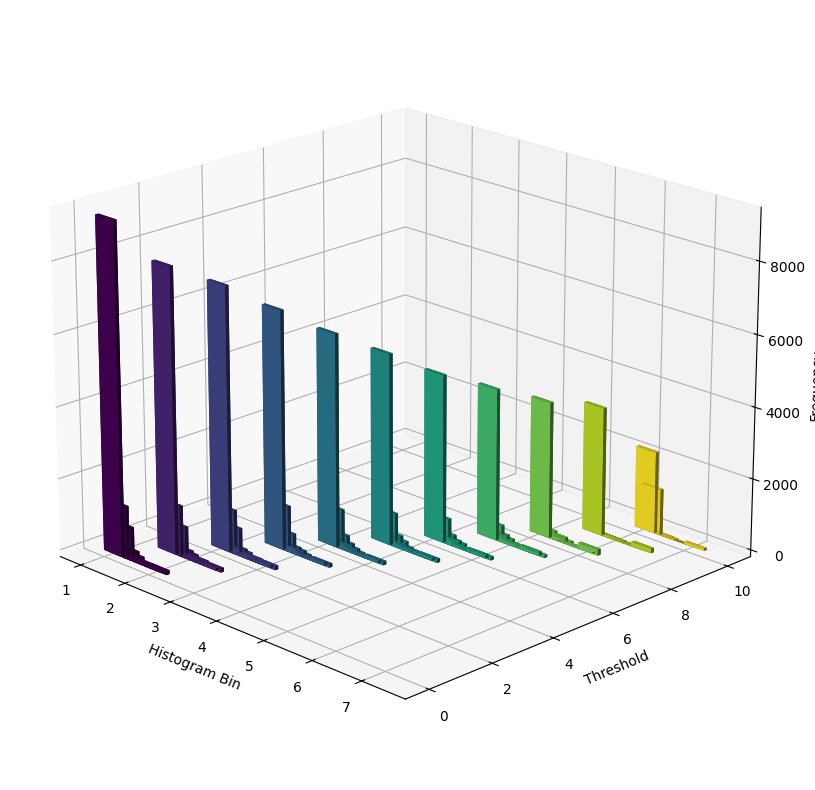

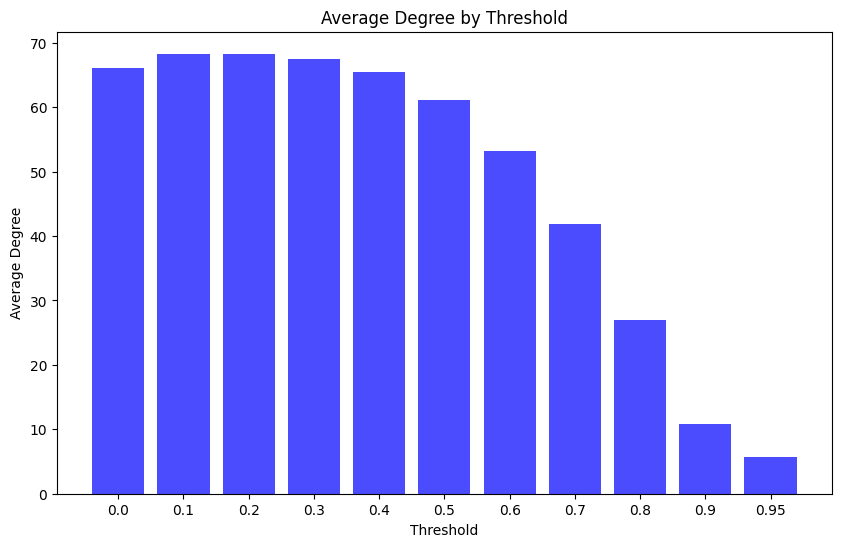

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Directory containing the CSV files
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics'

# Thresholds explicitly defined for sequential order
thresholds = [f'{i/10:.1f}' for i in range(10)] + ['0.95']

# Generate the full file paths
file_paths = [os.path.join(directory_path, f'BH_{threshold}.csv') for threshold in thresholds]

# Function to read data, calculate histogram and average degree
def get_degree_data(file_path):
    try:
        data = pd.read_csv(file_path)
        if 'Degree' in data.columns:
            counts, _ = np.histogram(data['Degree'], bins=10)
            avg_degree = data['Degree'].mean()
            return counts, avg_degree
        else:
            print(f"'Degree' column not found in {file_path}")
            return None, None
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, None

# Collect all histograms and average degrees
degree_data = [get_degree_data(path) for path in file_paths]
degree_distributions = [data[0] for data in degree_data if data[0] is not None]
average_degrees = [data[1] for data in degree_data if data[1] is not None]

# First plot: Histograms in 3D
fig1 = plt.figure(figsize=(14, 10))
ax1 = fig1.add_subplot(111, projection='3d')
colors = plt.cm.viridis(np.linspace(0, 1, len(degree_distributions)))

# Plotting histograms
for i, counts in enumerate(degree_distributions):
    if counts is not None:
        x = np.linspace(1 + i * 0.5, 1 + i * 0.5 + 1, 10)  # Adjust x for each histogram
        y = np.full(10, i)  # Y position set to the index of the threshold
        ax1.bar3d(x, y, np.zeros(10), 0.4, 0.1, counts, color=colors[i])

ax1.set_xlabel('Histogram Bin')
ax1.set_ylabel('Threshold')
ax1.set_zlabel('Frequency')
ax1.view_init(elev=20, azim=-45)

# Second plot: Average Degree
fig2, ax2 = plt.figure(figsize=(10, 6)), plt.subplot()
ax2.bar(thresholds, average_degrees, color='blue', alpha=0.7)
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Average Degree')
ax2.set_title('Average Degree by Threshold')

plt.show()



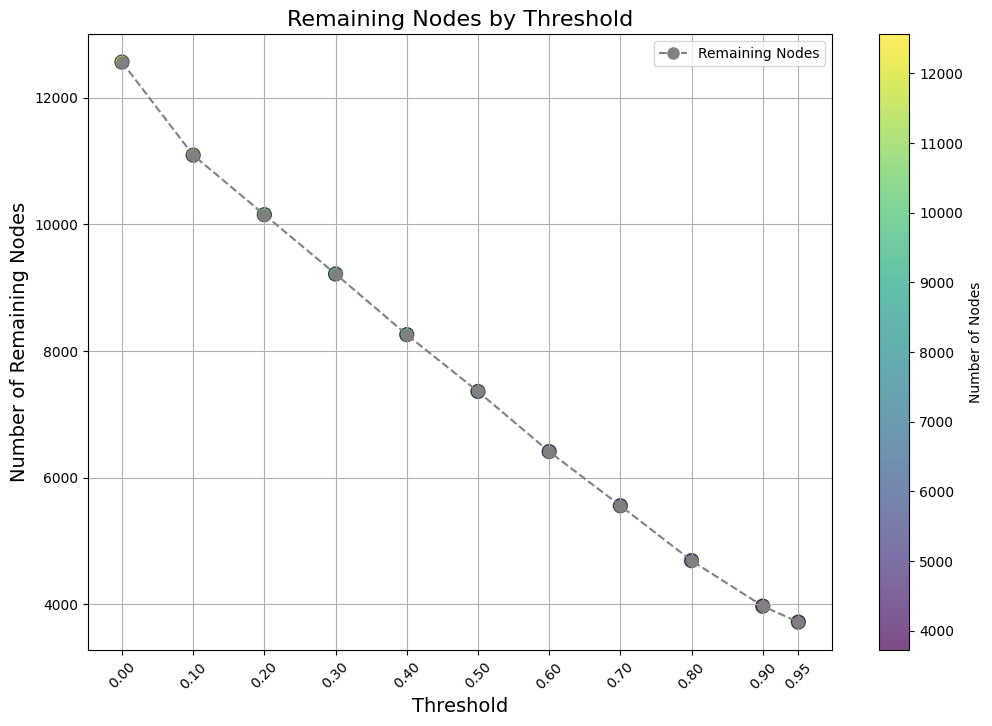

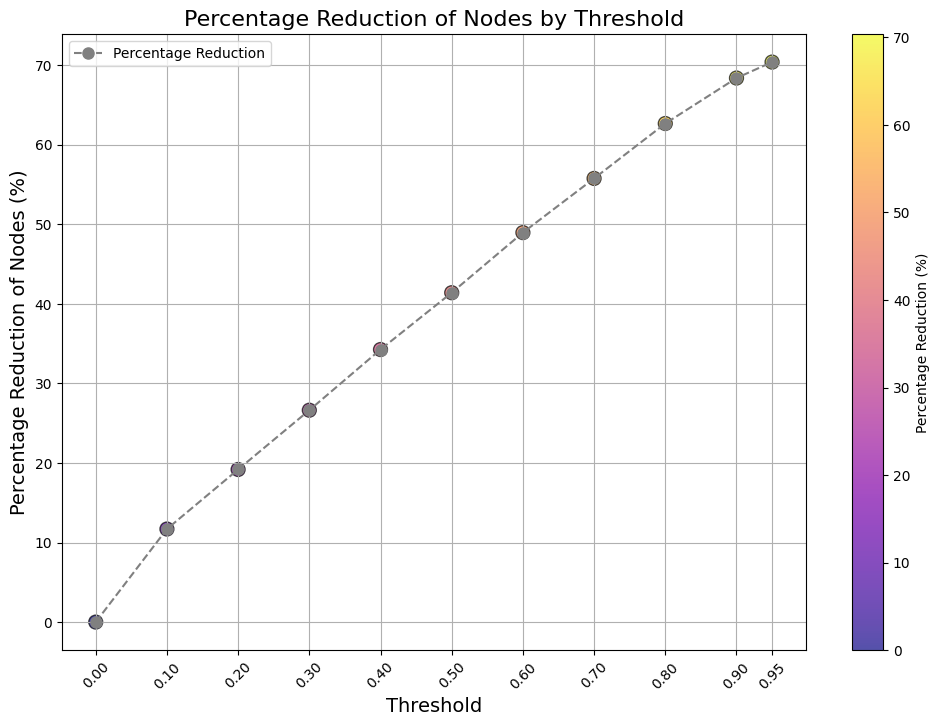

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the CSV files
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics'

# Thresholds explicitly defined for sequential order
thresholds = [f'{i/10:.1f}' for i in range(10)] + ['0.95']

# Generate the full file paths
file_paths = [os.path.join(directory_path, f'BH_{threshold}.csv') for threshold in thresholds]

# Initialize lists to store the data
num_nodes = []
threshold_labels = []

# Loop through each file path and count the number of nodes
for path in file_paths:
    data = pd.read_csv(path)
    num_nodes.append(data['Id'].nunique())  # Assumes 'Id' is the column with node IDs
    threshold_labels.append(path.split('_')[-1].split('.csv')[0])  # Extracts threshold from filename

# Calculate the percentage reduction of nodes
initial_nodes = num_nodes[0]  # Number of nodes at threshold 0.0
percentage_reduction = [100 * (1 - x / initial_nodes) for x in num_nodes]

# Convert lists to arrays for better handling in plots
thresholds_array = np.array([float(label) for label in threshold_labels])
num_nodes_array = np.array(num_nodes)
percentage_reduction_array = np.array(percentage_reduction)

# Creating a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(thresholds)))

# Plot 1: Remaining Nodes by Threshold
fig, ax1 = plt.subplots(figsize=(12, 8))
scatter1 = ax1.scatter(thresholds_array, num_nodes_array, c=num_nodes_array, cmap='viridis', s=100, edgecolor='k', alpha=0.7)
ax1.plot(thresholds_array, num_nodes_array, label='Remaining Nodes', color='gray', linestyle='--', marker='o', markersize=8)
cbar1 = plt.colorbar(scatter1)
cbar1.set_label('Number of Nodes')
ax1.set_xlabel('Threshold', fontsize=14)
ax1.set_ylabel('Number of Remaining Nodes', fontsize=14)
ax1.set_title('Remaining Nodes by Threshold', fontsize=16)
# Tweak the x-axis to show all labels clearly
plt.xticks(rotation=45)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
ax1.grid(True)
ax1.legend()

# Plot 2: Percentage Reduction of Nodes by Threshold
fig, ax2 = plt.subplots(figsize=(12, 8))
scatter2 = ax2.scatter(thresholds_array, percentage_reduction_array, c=percentage_reduction_array, cmap='plasma', s=100, edgecolor='k', alpha=0.7)
ax2.plot(thresholds_array, percentage_reduction_array, label='Percentage Reduction', color='gray', linestyle='--', marker='o', markersize=8)
cbar2 = plt.colorbar(scatter2)
cbar2.set_label('Percentage Reduction (%)')
ax2.set_xlabel('Threshold', fontsize=14)
ax2.set_ylabel('Percentage Reduction of Nodes (%)', fontsize=14)
ax2.set_title('Percentage Reduction of Nodes by Threshold', fontsize=16)

# Tweak the x-axis to show all labels clearly
plt.xticks(rotation=45)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
ax2.grid(True)
ax2.legend()

plt.show()



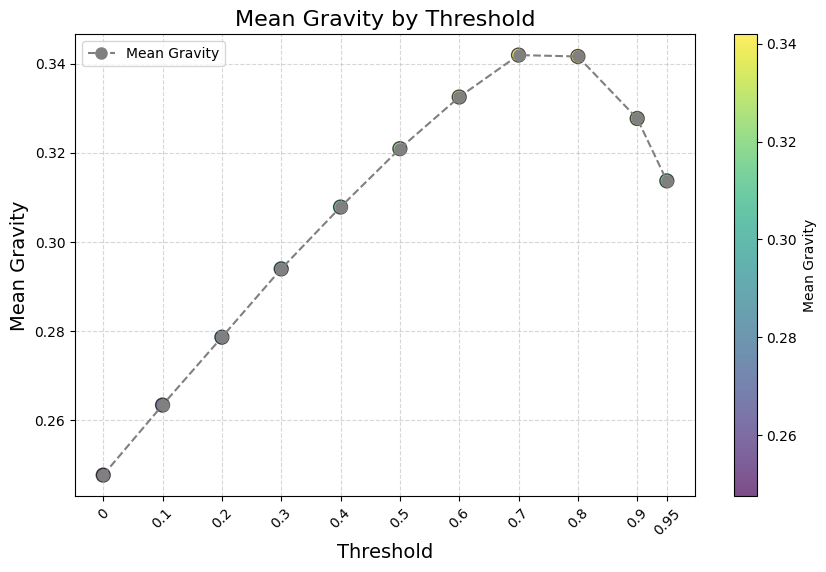

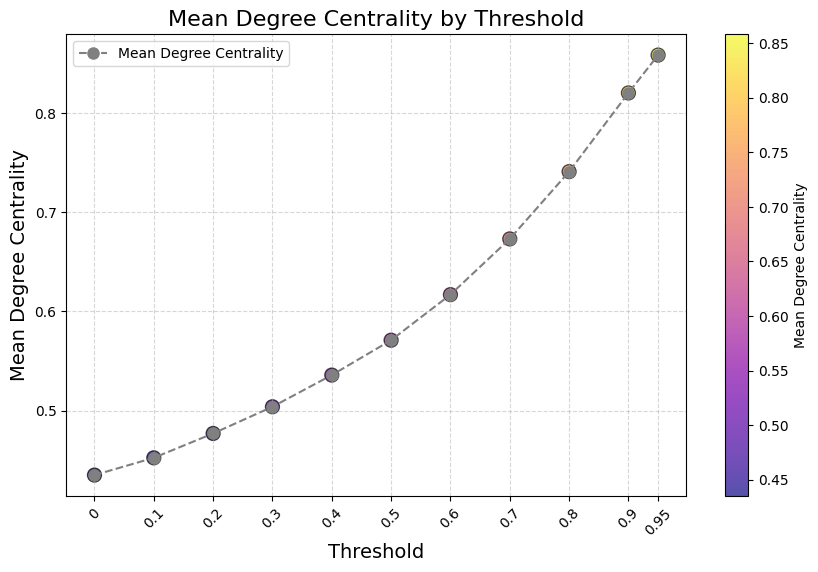

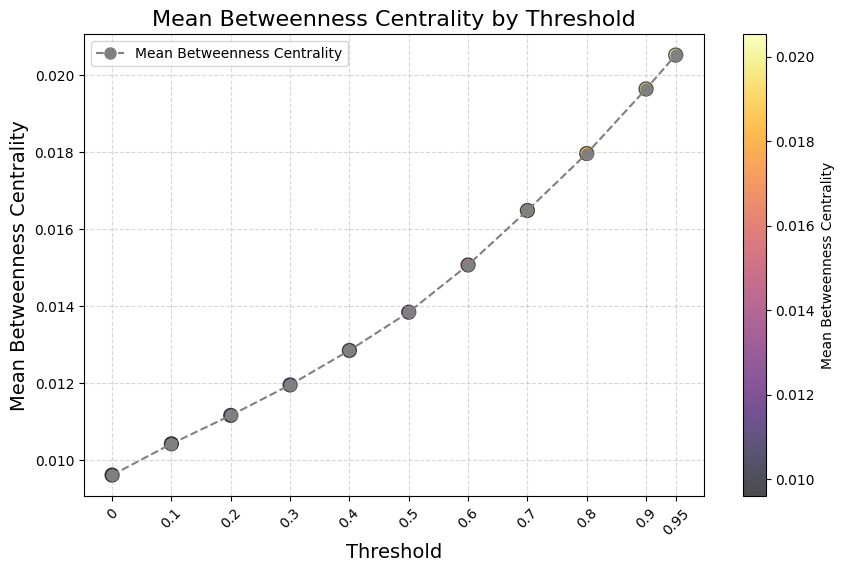

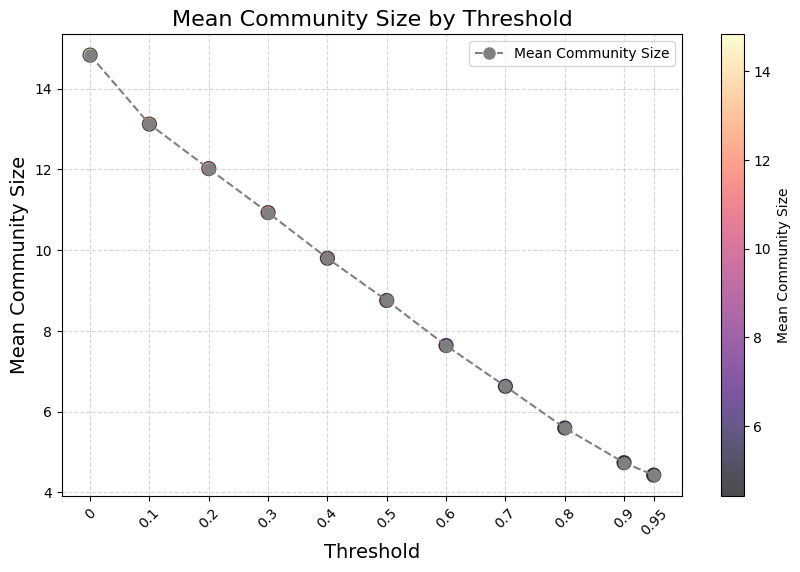

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the CSV files
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data'

# Identify all relevant CSV files
files = sorted([f for f in os.listdir(directory_path) if f.startswith('Node_features_blackhole_')])

# Storage for data
data_agg = []

# Loop through each file and compute required statistics
for file in files:
    path = os.path.join(directory_path, file)
    data = pd.read_csv(path)

    # Extract threshold from filename
    threshold = file.split('_')[-1].replace('.csv', '')
    threshold = float(threshold)  # Convert to float

    # Compute mean of each metric
    mean_gravity = data['Gravity'].mean() if 'Gravity' in data.columns else None
    mean_degree_centrality = data['Degree Centrality'].mean() if 'Degree Centrality' in data.columns else None
    mean_betweenness_centrality = data['Betweenness Centrality'].mean() if 'Betweenness Centrality' in data.columns else None

    # Calculate the mean community size
    community_sizes = data['Community ID'].value_counts() if 'Community ID' in data.columns else None
    mean_community_size = community_sizes.mean() if community_sizes is not None else None

    # Append results to the list
    data_agg.append({
        'Threshold': threshold,
        'Mean Gravity': mean_gravity,
        'Mean Degree Centrality': mean_degree_centrality,
        'Mean Betweenness Centrality': mean_betweenness_centrality,
        'Mean Community Size': mean_community_size
    })

# Convert to DataFrame for easier manipulation
result_df = pd.DataFrame(data_agg)
result_df.sort_values(by='Threshold', inplace=True)  # Sort data by threshold

# Metrics to plot
metrics = ['Mean Gravity', 'Mean Degree Centrality', 'Mean Betweenness Centrality', 'Mean Community Size']
colors = ['viridis', 'plasma', 'inferno', 'magma']

# Define x-ticks
x_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

# Plot each metric in a separate figure
for i, metric in enumerate(metrics):
    if result_df[metric].notnull().any():  # Ensure there's data to plot
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(result_df['Threshold'], result_df[metric], c=result_df[metric], cmap=colors[i], s=100, edgecolor='k', alpha=0.7)
        plt.plot(result_df['Threshold'], result_df[metric], label=f'{metric}', color='gray', linestyle='--', marker='o', markersize=8)
        cbar = plt.colorbar(scatter)
        cbar.set_label(f'{metric}')
        plt.xlabel('Threshold', fontsize=14)
        plt.ylabel(f'{metric}', fontsize=14)
        plt.title(f'{metric} by Threshold', fontsize=16)
        plt.xticks(x_ticks, labels=[str(x) for x in x_ticks], rotation=45)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend()
        plt.show()


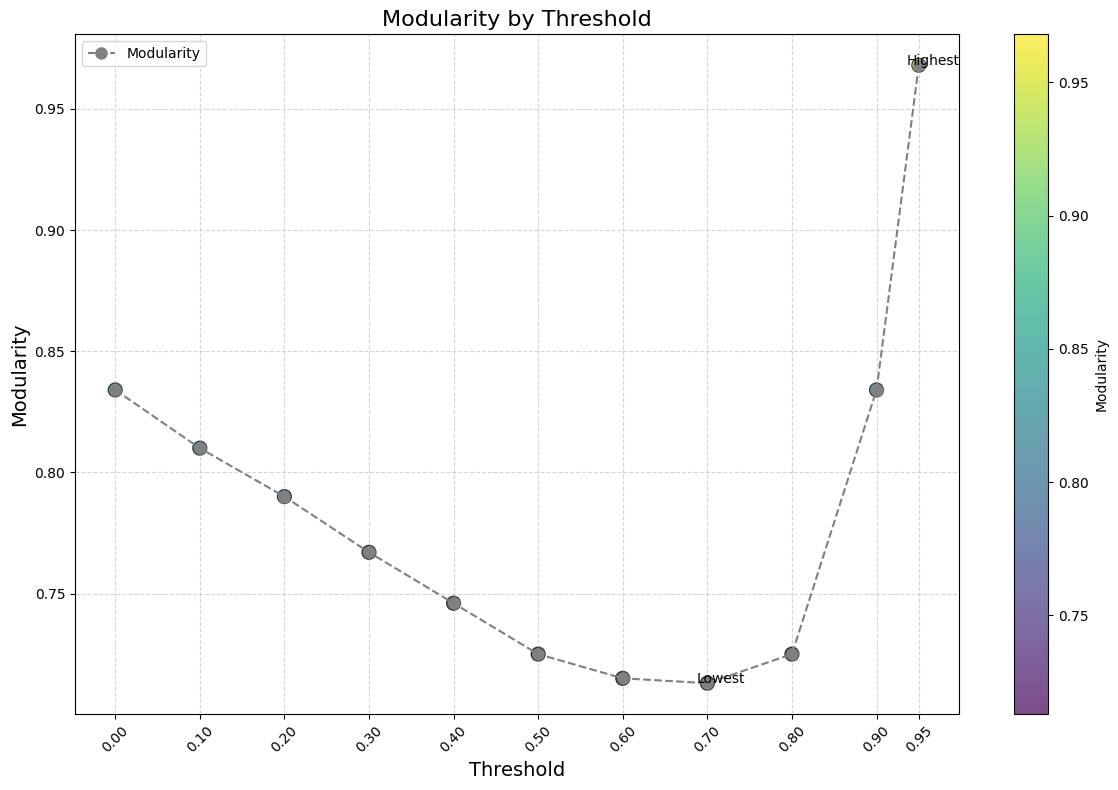

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the Modularity.csv file
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics'
modularity_path = os.path.join(directory_path, 'Modularity.csv')

# Load Modularity data
modularity_data = pd.read_csv(modularity_path)

# Sorting data by Dataset (Threshold) if not already sorted
modularity_data.sort_values('Dataset', inplace=True)

# Assuming the Dataset values are stored as strings, convert them to float for sorting purposes if necessary
modularity_data['Dataset'] = modularity_data['Dataset'].astype(float)

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Creating a color gradient based on the modularity values
norm = plt.Normalize(min(modularity_data['Modularity']), max(modularity_data['Modularity']))
colors = plt.cm.viridis(norm(modularity_data['Modularity']))

# Line plot with color gradient and markers
scatter = ax.scatter(modularity_data['Dataset'], modularity_data['Modularity'], c=modularity_data['Modularity'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)
line = ax.plot(modularity_data['Dataset'], modularity_data['Modularity'], label='Modularity', color='gray', linestyle='--', marker='o', markersize=8)
cbar = plt.colorbar(scatter)
cbar.set_label('Modularity')

# Annotating the highest and lowest points
ax.annotate('Highest', xy=(modularity_data['Dataset'][modularity_data['Modularity'].idxmax()], max(modularity_data['Modularity'])), xytext=(10,0),
             textcoords='offset points', ha='center', color='black')
ax.annotate('Lowest', xy=(modularity_data['Dataset'][modularity_data['Modularity'].idxmin()], min(modularity_data['Modularity'])), xytext=(10,0),
             textcoords='offset points', ha='center', color='black')

# Adding labels and title
ax.set_xlabel('Threshold', fontsize=14)
ax.set_ylabel('Modularity', fontsize=14)
ax.set_title('Modularity by Threshold', fontsize=16)

# Tweak the x-axis to show all labels clearly
plt.xticks(rotation=45)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])

# Showing the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


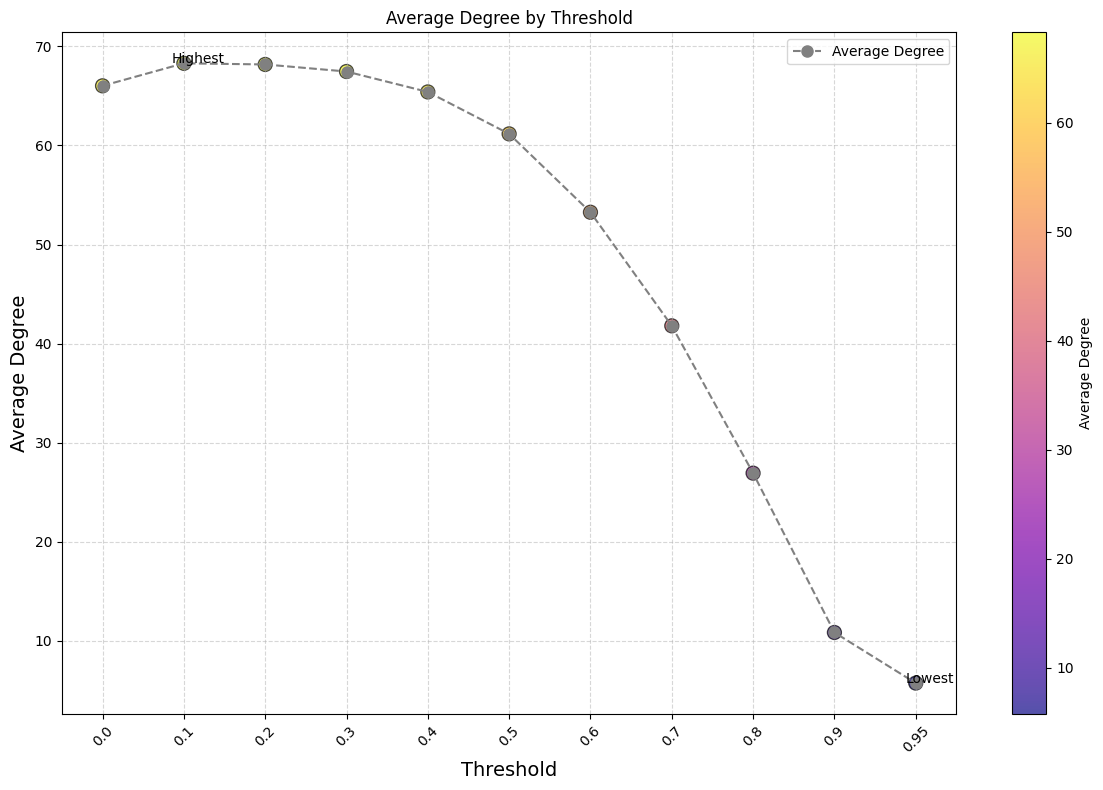

In [ ]:


import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Directory containing the CSV files
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics'

# Thresholds explicitly defined for sequential order
thresholds = [f'{i/10:.1f}' for i in range(10)] + ['0.95']

# Generate the full file paths
file_paths = [os.path.join(directory_path, f'BH_{threshold}.csv') for threshold in thresholds]


# Function to read data, calculate histogram and average degree
def get_degree_data(file_path):
    try:
        data = pd.read_csv(file_path)
        if 'Degree' in data.columns:
            counts, _ = np.histogram(data['Degree'], bins=10)
            avg_degree = data['Degree'].mean()
            return counts, avg_degree
        else:
            print(f"'Degree' column not found in {file_path}")
            return None, None
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, None

# Collect all histograms and average degrees
degree_data = [get_degree_data(path) for path in file_paths]
average_degrees = [data[1] for data in degree_data if data[1] is not None]

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Creating a color gradient based on the average degree values
norm = plt.Normalize(min(average_degrees), max(average_degrees))
colors = plt.cm.plasma(norm(average_degrees))

# Line plot with color gradient and markers
scatter = ax.scatter(thresholds, average_degrees, c=average_degrees, cmap='plasma', s=100, edgecolor='k', alpha=0.7)
line = ax.plot(thresholds, average_degrees, label='Average Degree', color='gray', linestyle='--', marker='o', markersize=8)
cbar = plt.colorbar(scatter)
cbar.set_label('Average Degree')

# Annotating the highest and lowest points
ax.annotate('Highest', xy=(thresholds[np.argmax(average_degrees)], max(average_degrees)), xytext=(10,0),
             textcoords='offset points', ha='center', color='black')
ax.annotate('Lowest', xy=(thresholds[np.argmin(average_degrees)], min(average_degrees)), xytext=(10,0),
             textcoords='offset points', ha='center', color='black')

# Adding labels and title
ax.set_xlabel('Threshold', fontsize=14)
ax.set_ylabel('Average Degree', fontsize=14)
ax.set_title('Average Degree by Threshold')

# Tweak the x-axis to show all labels clearly
plt.xticks(rotation=45)

# Showing the plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [2]:
import os
import pandas as pd
import networkx as nx
import numpy as np

# Function to calculate graph energy
def calculate_graph_energy(G):
    """
    Calculate the graph energy of a graph G.
    """
    adjacency_matrix = nx.to_numpy_array(G)
    eigenvalues = np.linalg.eigvals(adjacency_matrix)
    energy = sum(abs(eigenvalues))
    return energy

# Directory containing the CSV files
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data'

# List all files in the directory and filter out the relevant CSV files
files = [f for f in os.listdir(directory_path) if f.startswith('Edges_blackhole_')]

# Check if there are any matching files
if not files:
    print("No files found in the directory with the specified prefix.")
    exit()

# Initialize an empty DataFrame to collect all results
all_results = pd.DataFrame()

# Iterate over each file
for file in files:
    print(f"Processing file: {file}")

    # Path to the file
    path = os.path.join(directory_path, file)

    # Read the CSV file with explicit column names
    edges = pd.read_csv(path, header=None, sep=r'\s+', names=['Source', 'Target', 'Weight'])

    # Ensure that the Weight column is numeric
    edges['Weight'] = pd.to_numeric(edges['Weight'], errors='coerce')

    # Drop rows with NaN weights (from non-numeric or missing values)
    edges = edges.dropna(subset=['Weight'])

    # Convert the Weight column to numeric if not already
    edges['Weight'] = edges['Weight'].astype(float)

    # Remove rows with missing values
    edges = edges.dropna()

    # Strip whitespace from columns
    edges['Source'] = edges['Source'].astype(str).str.strip()
    edges['Target'] = edges['Target'].astype(str).str.strip()

    # Remove self-loops if necessary
    edges = edges[edges['Source'] != edges['Target']]

    # Create a graph from the cleaned edges
    G = nx.from_pandas_edgelist(edges, source='Source', target='Target', edge_attr='Weight')

    # Compute graph properties
    n = G.number_of_nodes()
    total_pairs = n * (n - 1) / 2
    components = list(nx.connected_components(G))
    reachable_pairs = sum(len(c) * (len(c) - 1) / 2 for c in components)
    unreachable_pairs = total_pairs - reachable_pairs
    unreachable_ratio = unreachable_pairs / total_pairs if total_pairs > 0 else 0
    isolated_nodes = list(nx.isolates(G))
    isolated_ratio = len(isolated_nodes) / n if n > 0 else 0
    graph_energy = calculate_graph_energy(G)

    # Create a results DataFrame for the current file
    results = pd.DataFrame({
        'File': [file],
        'Total Pairs': [total_pairs],
        'Unreachable Pairs': [unreachable_pairs],
        'Unreachable Ratio': [unreachable_ratio],
        'Isolated Vertices': [len(isolated_nodes)],
        'Isolated Ratio': [isolated_ratio],
        'Number of Nodes': [n],
        'Graph Energy': [graph_energy]
    })

    # Append the results of the current file to the master DataFrame
    all_results = pd.concat([all_results, results], ignore_index=True)

# Save the master results to a single CSV file
output_file = 'All_Node_Results.csv'
all_results.to_csv(os.path.join(directory_path, output_file), index=False)

# Print final results to check
print(f"All analysis complete. Results for all files saved to '{output_file}'.")


Processing file: Edges_blackhole_0.csv
Processing file: Edges_blackhole_0.1.csv
Processing file: Edges_blackhole_0.2.csv
Processing file: Edges_blackhole_0.3.csv
Processing file: Edges_blackhole_0.4.csv
Processing file: Edges_blackhole_0.5.csv
Processing file: Edges_blackhole_0.6.csv
Processing file: Edges_blackhole_0.7.csv
Processing file: Edges_blackhole_0.8.csv
Processing file: Edges_blackhole_0.9.csv
Processing file: Edges_blackhole_0.95.csv
All analysis complete. Results for all files saved to 'All_Node_Results.csv'.


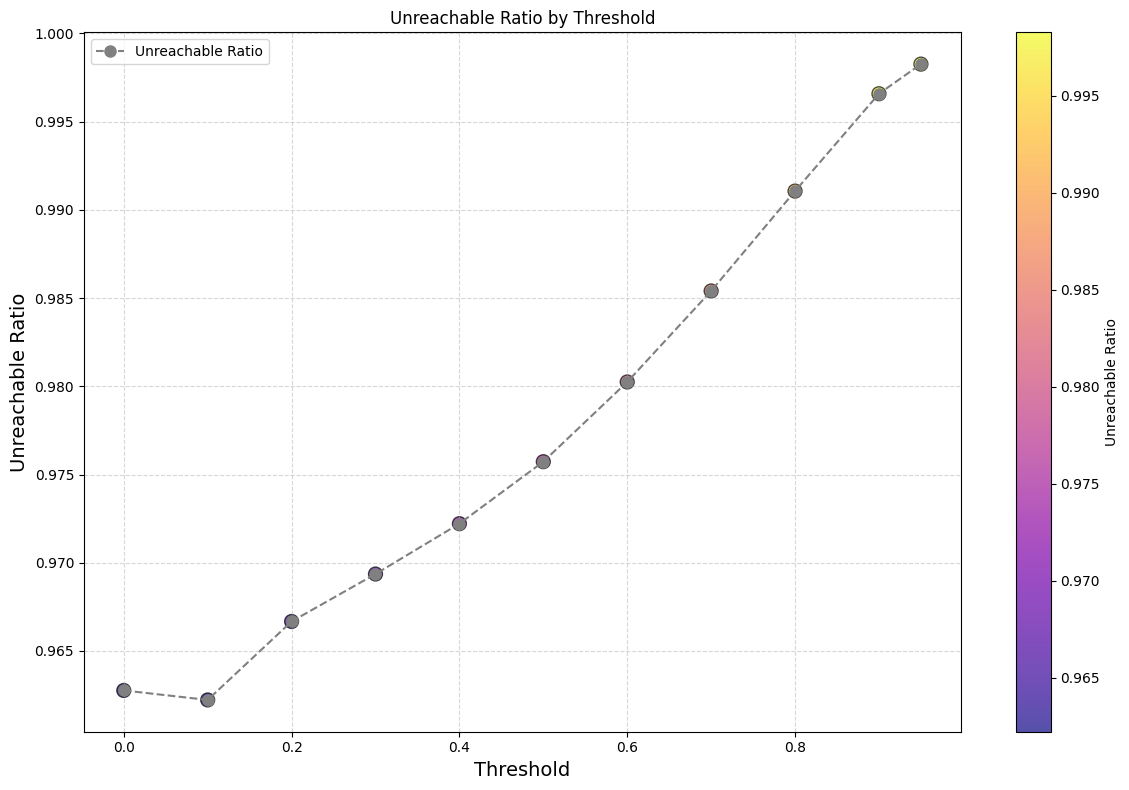

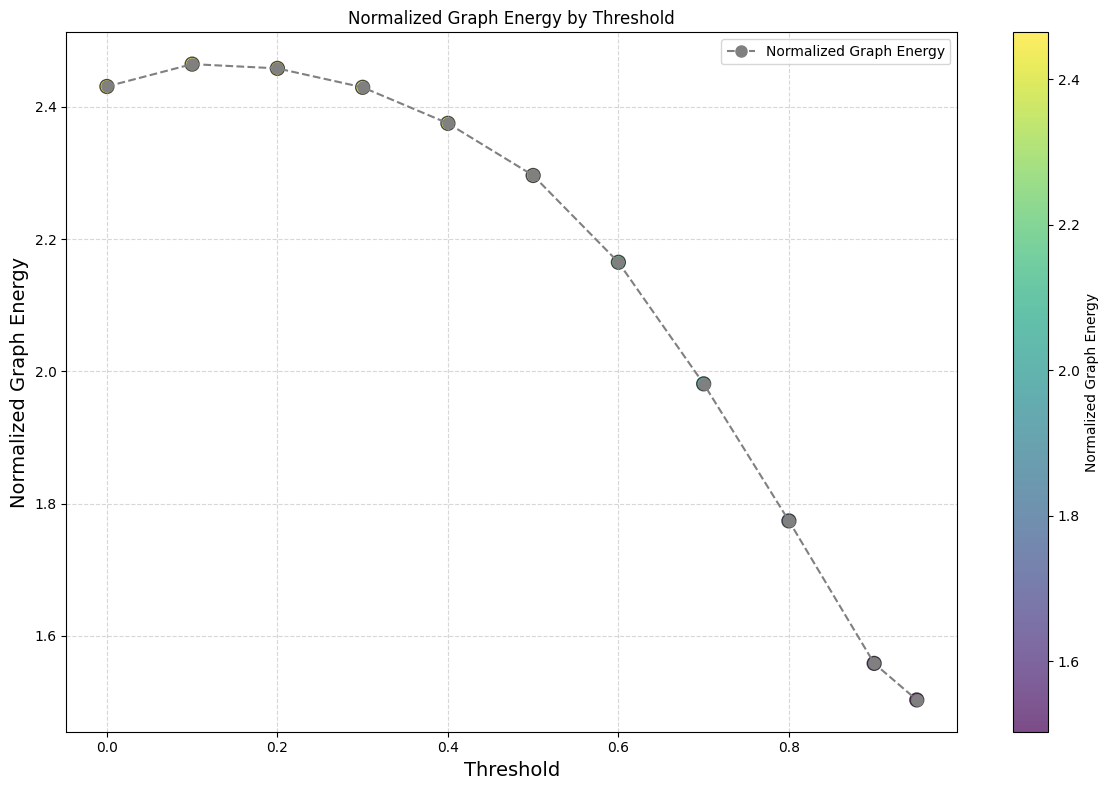

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Define the directory path where the CSV file is stored
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data'

# Load the CSV file
file_path = os.path.join(directory_path, 'All_Node_Results.csv')
data = pd.read_csv(file_path)

# Calculate normalized graph energy if not already included
if 'Normalized Graph Energy' not in data.columns:
    data['Normalized Graph Energy'] = data['Graph Energy'] / data['Number of Nodes']

# Attempt to extract a numeric threshold from the file name
def extract_threshold(filename):
    match = re.findall(r'\d+\.?\d*', filename)
    if match:
        return float(match[0])
    else:
        return None

data['Threshold'] = data['File'].apply(extract_threshold)
data = data.dropna(subset=['Threshold'])  # Filter out rows without thresholds

# Sorting data based on Threshold to assist in plotting lines
data.sort_values('Threshold', inplace=True)

# Unreachable Ratio Plot
fig, ax = plt.subplots(figsize=(12, 8))
norm = plt.Normalize(min(data['Unreachable Ratio']), max(data['Unreachable Ratio']))
colors = plt.cm.plasma(norm(data['Unreachable Ratio']))
scatter = ax.scatter(data['Threshold'], data['Unreachable Ratio'], c=data['Unreachable Ratio'], cmap='plasma', s=100, edgecolor='k', alpha=0.7)
line = ax.plot(data['Threshold'], data['Unreachable Ratio'], label='Unreachable Ratio', color='gray', linestyle='--', marker='o', markersize=8)
cbar = plt.colorbar(scatter)
cbar.set_label('Unreachable Ratio')
ax.set_xlabel('Threshold', fontsize=14)
ax.set_ylabel('Unreachable Ratio', fontsize=14)
ax.set_title('Unreachable Ratio by Threshold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Normalized Graph Energy Plot
fig, ax = plt.subplots(figsize=(12, 8))
norm = plt.Normalize(min(data['Normalized Graph Energy']), max(data['Normalized Graph Energy']))
colors = plt.cm.viridis(norm(data['Normalized Graph Energy']))
scatter = ax.scatter(data['Threshold'], data['Normalized Graph Energy'], c=data['Normalized Graph Energy'], cmap='viridis', s=100, edgecolor='k', alpha=0.7)
line = ax.plot(data['Threshold'], data['Normalized Graph Energy'], label='Normalized Graph Energy', color='gray', linestyle='--', marker='o', markersize=8)
cbar = plt.colorbar(scatter)
cbar.set_label('Normalized Graph Energy')
ax.set_xlabel('Threshold', fontsize=14)
ax.set_ylabel('Normalized Graph Energy', fontsize=14)
ax.set_title('Normalized Graph Energy by Threshold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import networkx as nx
import numpy as np
from scipy.sparse.linalg import eigsh

# Directory containing the edge list CSV files
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data'

# List all files in the directory that start with "Edges_blackhole_"
files = [f for f in os.listdir(directory_path) if f.startswith('Edges_blackhole_')]

# Function to calculate graph energy using sparse matrix eigenvalues
def calculate_graph_energy(G):
    # Convert the graph to a sparse adjacency matrix
    A = nx.adjacency_matrix(G).astype(float)  # Ensure the matrix is float type

    # Compute the largest k eigenvalues (k is smaller for efficiency)
    k = min(6, A.shape[0] - 1)  # Compute up to 6 eigenvalues or fewer if the graph is very small
    eigenvalues = eigsh(A, k=k, return_eigenvectors=False, which='LM')

    # Calculate graph energy as the sum of absolute values of eigenvalues
    graph_energy = np.sum(np.abs(eigenvalues))
    return graph_energy

# Process each file
results = []
for file in files:
    path = os.path.join(directory_path, file)
    print(f"Processing file: {file}")

    try:
        # Read the edge list from the CSV file without a header row
        edge_data = pd.read_csv(path, header=None, names=['Source', 'Target', 'Weight'])

        # Create a graph with the correct weight attribute
        G = nx.from_pandas_edgelist(edge_data, source='Source', target='Target', edge_attr='Weight')

        # Calculate graph energy
        graph_energy = calculate_graph_energy(G)
        print(f"Graph Energy for {file}: {graph_energy}")
        print(f"Graph {file} - Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}, Density={nx.density(G)}")

        # Store results
        results.append({'File': file, 'Graph Energy': graph_energy})
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results)
output_path = os.path.join(directory_path, 'graph_energy_results.csv')
results_df.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")


Processing file: Edges_blackhole_0.csv
Graph Energy for Edges_blackhole_0.csv: 6.000000000000004
Graph Edges_blackhole_0.csv - Nodes: 829300, Edges: 414650, Density=1.205837701480407e-06
Processing file: Edges_blackhole_0.1.csv
Graph Energy for Edges_blackhole_0.1.csv: 6.0000000000000036
Graph Edges_blackhole_0.1.csv - Nodes: 757500, Edges: 378750, Density=1.3201337559521531e-06
Processing file: Edges_blackhole_0.2.csv
Graph Energy for Edges_blackhole_0.2.csv: 6.000000000000003
Graph Edges_blackhole_0.2.csv - Nodes: 692144, Edges: 346072, Density=1.4447881434905792e-06
Processing file: Edges_blackhole_0.3.csv
Graph Energy for Edges_blackhole_0.3.csv: 6.000000000000003
Graph Edges_blackhole_0.3.csv - Nodes: 621756, Edges: 310878, Density=1.6083505560872047e-06
Processing file: Edges_blackhole_0.4.csv
Graph Energy for Edges_blackhole_0.4.csv: 6.000000000000001
Graph Edges_blackhole_0.4.csv - Nodes: 540114, Edges: 270057, Density=1.851464415779661e-06
Processing file: Edges_blackhole_0.5.

Processing file: Edges_blackhole_0.1.csv
Graph Edges_blackhole_0.1.csv - Energy: 6.000000000000003, Density: 1.3201337559521531e-06, Edges: 378750
Processing file: Edges_blackhole_0.2.csv
Graph Edges_blackhole_0.2.csv - Energy: 6.000000000000005, Density: 1.4447881434905792e-06, Edges: 346072
Processing file: Edges_blackhole_0.3.csv
Graph Edges_blackhole_0.3.csv - Energy: 6.0000000000000036, Density: 1.6083505560872047e-06, Edges: 310878
Processing file: Edges_blackhole_0.4.csv
Graph Edges_blackhole_0.4.csv - Energy: 6.0000000000000036, Density: 1.851464415779661e-06, Edges: 270057
Processing file: Edges_blackhole_0.5.csv
Graph Edges_blackhole_0.5.csv - Energy: 6.0000000000000036, Density: 2.220845298137377e-06, Edges: 225140
Processing file: Edges_blackhole_0.6.csv
Graph Edges_blackhole_0.6.csv - Energy: 6.000000000000002, Density: 2.928214813838743e-06, Edges: 170753
Processing file: Edges_blackhole_0.7.csv
Graph Edges_blackhole_0.7.csv - Energy: 6.000000000000005, Density: 4.3052787

<ipython-input-15-b0979d8478fb>:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap_colors[i])(norm(results_df[metric]))


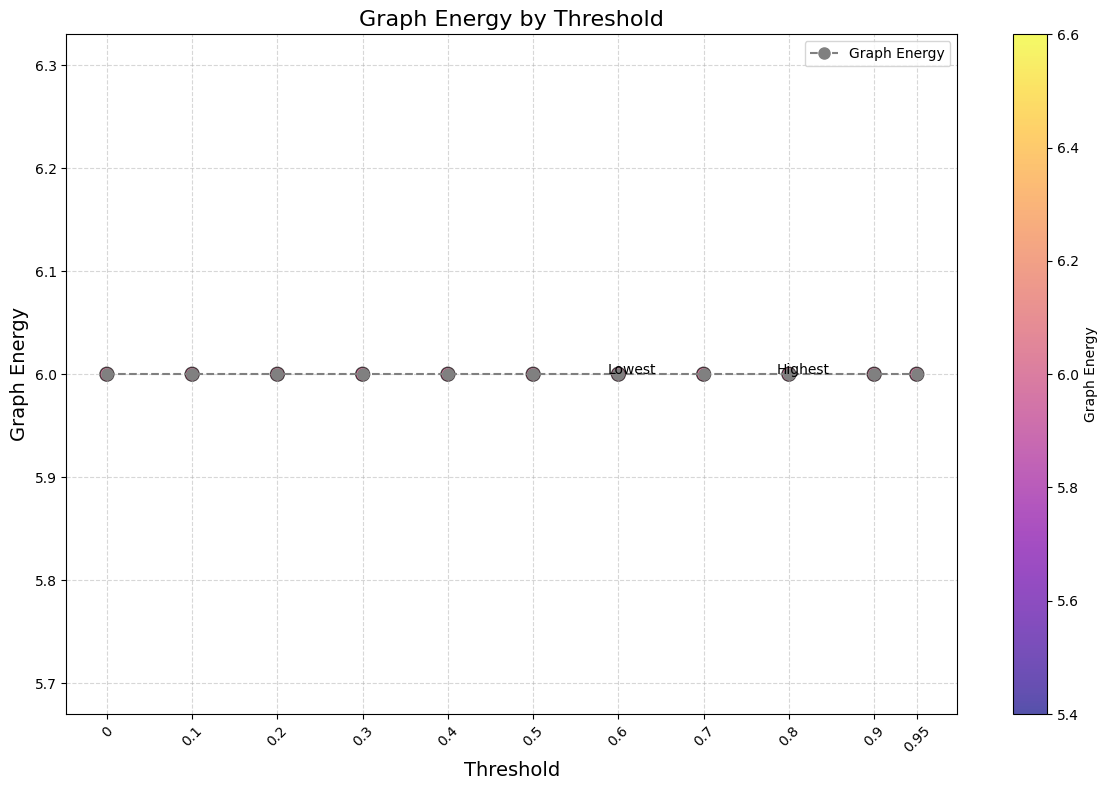

<ipython-input-15-b0979d8478fb>:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap_colors[i])(norm(results_df[metric]))


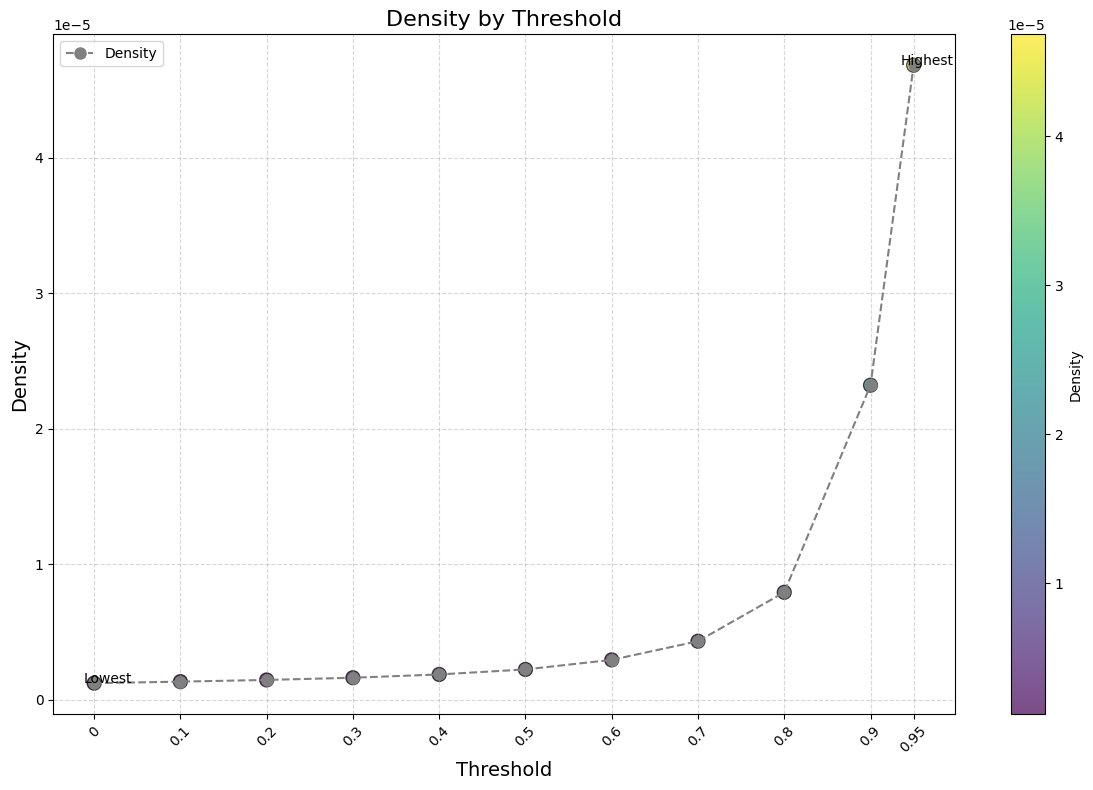

<ipython-input-15-b0979d8478fb>:81: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap(cmap_colors[i])(norm(results_df[metric]))


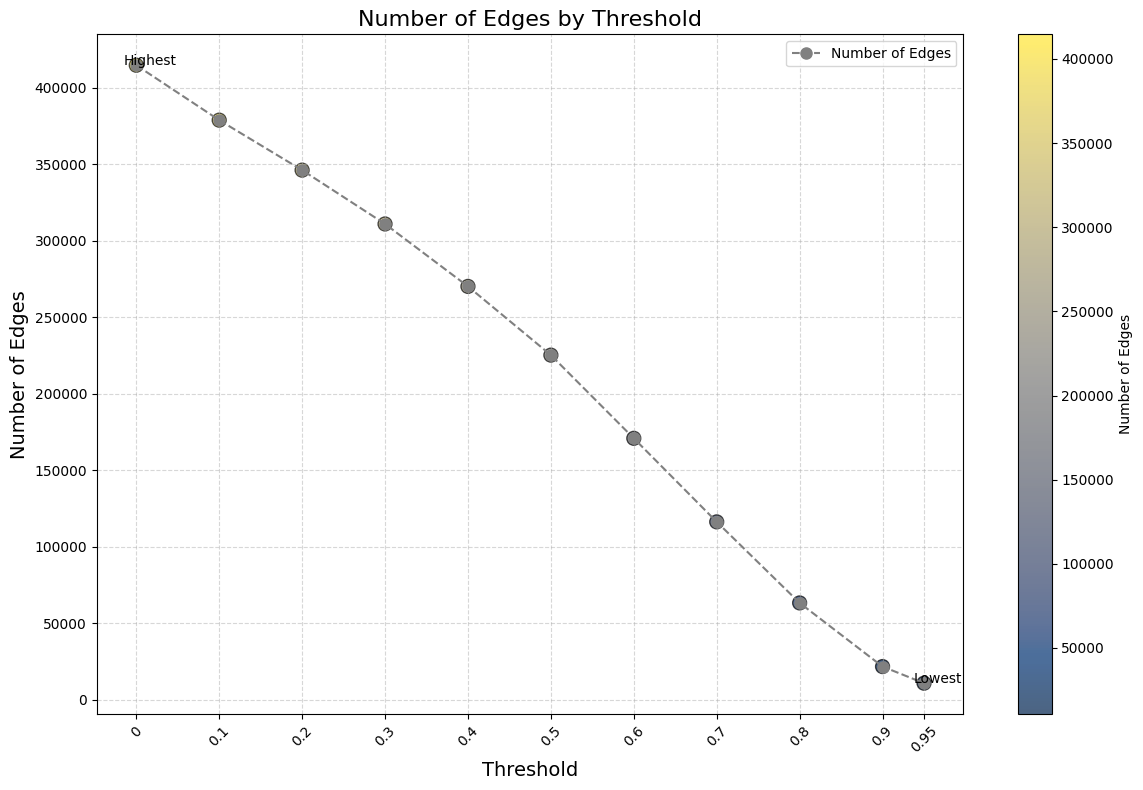

In [ ]:
import os
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

# Directory containing the edge list CSV files
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data'

# List all files in the directory that start with "Edges_blackhole_"
files = sorted([f for f in os.listdir(directory_path) if f.startswith('Edges_blackhole_')])

# Function to calculate graph energy using sparse matrix eigenvalues
def calculate_graph_energy(G):
    # Convert the graph to a sparse adjacency matrix
    A = nx.adjacency_matrix(G).astype(float)  # Ensure the matrix is float type

    # Compute the largest k eigenvalues (k is smaller for efficiency)
    k = min(6, A.shape[0] - 1)  # Compute up to 6 eigenvalues or fewer if the graph is very small
    eigenvalues = eigsh(A, k=k, return_eigenvectors=False, which='LM')

    # Calculate graph energy as the sum of absolute values of eigenvalues
    graph_energy = np.sum(np.abs(eigenvalues))
    return graph_energy

# Initialize storage for results
graph_metrics = []

# Process each file
for file in files:
    path = os.path.join(directory_path, file)
    print(f"Processing file: {file}")

    try:
        # Read the edge list from the CSV file without a header row
        edge_data = pd.read_csv(path, header=None, names=['Source', 'Target', 'Weight'])

        # Create a graph with the correct weight attribute
        G = nx.from_pandas_edgelist(edge_data, source='Source', target='Target', edge_attr='Weight')

        # Calculate graph metrics
        graph_energy = calculate_graph_energy(G)
        density = nx.density(G)
        num_edges = G.number_of_edges()

        print(f"Graph {file} - Energy: {graph_energy}, Density: {density}, Edges: {num_edges}")

        # Store results
        threshold = float(file.split('_')[-1].replace('.csv', ''))  # Extract threshold from filename
        graph_metrics.append({
            'Threshold': threshold,
            'Graph Energy': graph_energy,
            'Density': density,
            'Number of Edges': num_edges
        })
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Convert results to a DataFrame
results_df = pd.DataFrame(graph_metrics)
results_df.sort_values(by='Threshold', inplace=True)

# Save results to CSV
output_path = os.path.join(directory_path, 'graph_metrics_results.csv')
results_df.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")

# Define x-ticks
x_ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

# Plotting each metric using the requested style
metrics = ['Graph Energy', 'Density', 'Number of Edges']
titles = ['Graph Energy by Threshold', 'Density by Threshold', 'Number of Edges by Threshold']
y_labels = ['Graph Energy', 'Density', 'Number of Edges']
cmap_colors = ['plasma', 'viridis', 'cividis']

for i, metric in enumerate(metrics):
    plt.figure(figsize=(12, 8))
    norm = plt.Normalize(min(results_df[metric]), max(results_df[metric]))
    colors = plt.cm.get_cmap(cmap_colors[i])(norm(results_df[metric]))

    # Scatter plot with line
    scatter = plt.scatter(results_df['Threshold'], results_df[metric], c=results_df[metric], cmap=cmap_colors[i], s=100, edgecolor='k', alpha=0.7)
    line = plt.plot(results_df['Threshold'], results_df[metric], label=metric, color='gray', linestyle='--', marker='o', markersize=8)
    cbar = plt.colorbar(scatter)
    cbar.set_label(metric)

    # Annotating the highest and lowest points
    plt.annotate('Highest',
                 xy=(results_df['Threshold'][results_df[metric].idxmax()], max(results_df[metric])),
                 xytext=(10, 0), textcoords='offset points', ha='center', color='black')
    plt.annotate('Lowest',
                 xy=(results_df['Threshold'][results_df[metric].idxmin()], min(results_df[metric])),
                 xytext=(10, 0), textcoords='offset points', ha='center', color='black')

    # Adding labels and title
    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel(y_labels[i], fontsize=14)
    plt.title(titles[i], fontsize=16)

    # Tweak the x-axis to show all labels clearly
    plt.xticks(x_ticks, labels=[str(x) for x in x_ticks], rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

